# <u>Chapter 3: Introduction to your Kepler science lightcurve</u>

<div class="alert alert-block alert-info">

### This Notebook will give you the tools to:

- open Kepler science lighcurves
- understand data structure in fits files
- understand basic features of data
- start with fitting your dataset

### What you should achieve:

- plot and inspect data
- identify transits
- make a plan for modelling

### What's next:
after you have completed this notebook:

- perform detailed modelling of your data
- write up the summary of your modelling
- collect your results for the comparison with other datasets
    
### Table of contents:
    
- [1. Reading Kepler data](#sec:keplerdata)
- [2. Step by step guide to your data](#sec:dataguide)
- [Summary](#sec:summary)

<div class="alert alert-block alert-warning">
    
<b>Make sure to edit the box below to match your assigned object number.</b>

In [23]:
#Necessary imports
from astropy.io import fits #used to open fits files in which data are stored
import matplotlib.pyplot as plt #plotting
import glob
#add here the source number assigned to you, '1' (Team Osiris) or '2' (Team Dagon)
#Check Moodle to see which object has been assigned to you
mykepler = '1' 

<a id="sec:keplerdata"></a>
## 1. Reading Kepler data

First, we will have a look at the dataset, we have given you the fits dataset exactly as provided by Kepler, you can download additional datasets [on the Kepler archive](https://archive.stsci.edu/kepler/). We have though made the header anonymous so you cannot see which source you are working with. 

In [24]:
#Fits files are open like this:
lc = fits.open('Data/Object%slc/kplr%s_1.fits'%(mykepler, mykepler))

Fits files are common in astrophysics, they have different extensions, which can be images or tables. The information discribing the data is stored in the header.

In [25]:
lc

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fe0790e0f40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fe11b4981f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe11b49ebb0>]

In [26]:
#The header for the first extension can be accesses like this:
lc[0].header
#It contains basic information about the object (some of those removed here)

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-09'         / file creation date.                            
CREATOR = '826630 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

**You will see some of the header keywords to read 'None of your business', this is because we have anonymized the dataset for you. 

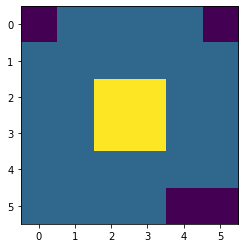

In [27]:
#The last extension holds a small image of the source:
plt.imshow(lc[2].data)

In [28]:
#It also has a header that gives more information
lc[2].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    6 / length of first array dimension                
NAXIS2  =                    6 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'APERTURE'           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
TELESCOP= 'Kepler  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
OBJECT  = 'None of your busi

In [29]:
#lets have a look at the second extension
lc[1]
#This is a table extension

In [30]:
#Here the beginning has a description of columns in the table, including the units
lc[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4370 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

This is our lightcirve extension. You will notice two lighcurves here. "SAP_FLUX" is the Simple Aperture Photometry, whereas "PDCSAP_FLUX" is Pre-search Data Condictioned, i.e. has had processing applied for calibration. 

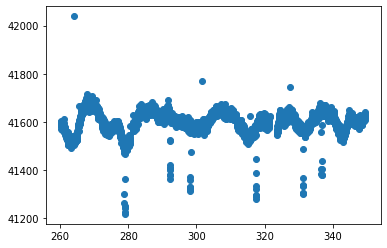

In [31]:
#Lets plot the lightcurve, you can plot the time and flux:
plt.plot(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], ls='None', marker='o')
#This plots the barycentre time and flux in e/s

<ErrorbarContainer object of 3 artists>

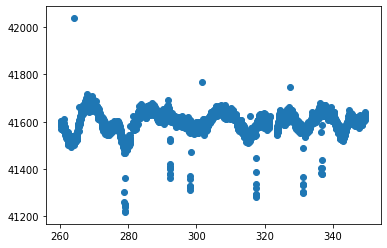

In [32]:
#Measurements errors are also included, you can plot them as follows
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
#We'll need to zoom in to see them:

<a id="sec:dataguide"></a>
## 2. Step by step guide to your data

#### Do not panic (or maybe do), what you have seen so far is only a small subset of the data you will be working with.

<div class="alert alert-block alert-success">
    
### Your turn: First look at data - signal-to-noise

- calculate the signal to noise of your lightcurve. Compare it to the signal-to-noise you required to detect a trsnait in Chapter 1. You can also compare it to some of the aperture photometry in Chapter 2.

<div class="alert alert-block alert-success">
    
### Your turn: First look at data - What does your lightcurve look like?

Make notes about your lightcurve: you will be fitting this for planets, do you see any complications?

<div class="alert alert-block alert-success">
    
### Your turn: Preparing for fitting:

Locate all transits and make a plot for each

In [33]:
## So far, we have only looked at a subset of the data, the full dataset is stored in the Data folder.
glob.glob('Data/Object%slc/kplr*.fits'%(mykepler)) #Lists all your lightcurve files

['Data/Object1lc/kplr1_11.fits',
 'Data/Object1lc/kplr1_3.fits',
 'Data/Object1lc/kplr1_6.fits',
 'Data/Object1lc/kplr1_12.fits',
 'Data/Object1lc/kplr1_14.fits',
 'Data/Object1lc/kplr1_8.fits',
 'Data/Object1lc/kplr1_2.fits',
 'Data/Object1lc/kplr1_13.fits',
 'Data/Object1lc/kplr1_5.fits',
 'Data/Object1lc/kplr1_17.fits',
 'Data/Object1lc/kplr1_1.fits',
 'Data/Object1lc/kplr1_7.fits',
 'Data/Object1lc/kplr1_4.fits',
 'Data/Object1lc/kplr1_16.fits',
 'Data/Object1lc/kplr1_10.fits',
 'Data/Object1lc/kplr1_15.fits',
 'Data/Object1lc/kplr1_9.fits']

<div class="alert alert-block alert-success">

### Your turn: plot the full lightcurve

In [34]:
import numpy as np
import tqdm

In [35]:
#THis works....
total_flux, total_time, total_flux_error = [], [], []

for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    tmptime = (tmp[1].data['TIME'])
    tmpflux = (tmp[1].data['PDCSAP_FLUX'])
    tmperror = (tmp[1].data['PDCSAP_FLUX_ERR'])

    tmpflux_mask, tmperror_mask  = np.isfinite(tmpflux), np.isfinite(tmperror)
    total_mask = np.logical_and(tmpflux_mask, tmperror_mask)

    time_sample, flux_sample, flux_sample_error = tmptime[total_mask], tmpflux[total_mask], tmpflux[total_mask]
    normalized_flux, normalized_flux_error = (flux_sample / np.mean(flux_sample)), (flux_sample_error / np.mean(flux_sample))


    from scipy.signal import savgol_filter
    interp_savgol = savgol_filter(normalized_flux, window_length=271, polyorder=3)

    total_flux.append(normalized_flux/ interp_savgol)
    total_flux_error.append(normalized_flux_error / interp_savgol)
    total_time.append(time_sample)

    #Mask all fluxes above upper value of 1 sigma of mean 
    tmp.close()

In [36]:
#Quick correction to get one array for flux, flux_err and time sorted in order. 
flux_arr = np.concatenate(total_flux)
flux_error_arr = np.concatenate(total_flux_error)
time_arr = np.concatenate(total_time)

sorted_flux = np.array([x for _, x in sorted(zip(time_arr, flux_arr), key=lambda pair: pair[0])])
sorted_time = np.array([_ for _, x in sorted(zip(time_arr, flux_arr), key=lambda pair: pair[0])])
sorted_flux_err = np.array([x for _, x in sorted(zip(time_arr, flux_error_arr), key=lambda pair: pair[0])])

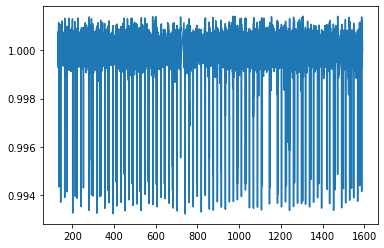

In [37]:
#Remove all above x sigma above mean to clean signal 
num_sigma = 2 
num_sigma_above_mean = np.mean(sorted_flux) + num_sigma * (np.std(sorted_flux))

flux_value_mask = np.logical_and([x < num_sigma_above_mean for x in sorted_flux],  [x > -1000 for x in sorted_flux])
flux, flux_err, time = sorted_flux[flux_value_mask], sorted_flux_err[flux_value_mask], sorted_time[flux_value_mask]

#Remove single erroneous data point 
plt.plot(time, flux)

In [38]:
import exoplanet as xo

pg = xo.estimators.bls_estimator(time, flux, flux_err, min_period=15, max_period=40)

peak = pg["peak_info"]
period_guess = peak["period"]
t0_guess = peak["transit_time"]
depth_guess = peak["depth"]

plt.plot(pg["bls"].period, pg["bls"].power, "k", linewidth=0.5)
plt.axvline(period_guess, alpha=0.3, linewidth=5)
plt.xlabel("period [days]")
plt.ylabel("bls power")
plt.yticks([])
_ = plt.xlim(pg["bls"].period.min(), pg["bls"].period.max())

In [ ]:
print(f"""
    period : {period_guess},
    transit guess : {t0_guess},
    depth_guess : {depth_guess}
""")


    period : 19.222997314785374,
    transit guess : 145.81301296925517,
    depth_guess : 0.002117254522572354



In [ ]:
transit_mask = (
    np.abs(
        (time - t0_guess + 0.5 * period_guess) % period_guess - 0.5 * period_guess
    )
    < 0.25
)
x = np.ascontiguousarray(time[transit_mask])
y = np.ascontiguousarray(flux[transit_mask])
yerr = np.ascontiguousarray(flux_err[transit_mask])

x_fold = (
    x - t0_guess + 0.5 * period_guess
) % period_guess - 0.5 * period_guess


x_fold_cord_mask = (x_fold > -0.09) & (x_fold < 0.09)
final_mask = ~np.logical_and(x_fold_cord_mask, (y > 0.999))

#final_mask = np.logical_and(final_mask, (x > 1100))

In [ ]:
x = x[final_mask]
x_fold = x_fold[final_mask]
y = y[final_mask]
yerr = yerr[final_mask]

In [ ]:
mask = x < 900

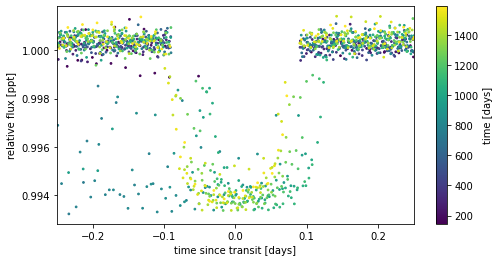

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x_fold, y, c=x, s=3)
plt.xlabel("time since transit [days]")
plt.ylabel("relative flux [ppt]")
plt.colorbar(label="time [days]")
_ = plt.xlim(-0.25, 0.25)

In [ ]:
import pymc3 as pm
import aesara_theano_fallback.tensor as tt

import pymc3_ext as pmx
from celerite2.theano import terms, GaussianProcess


with pm.Model() as model:

    # Stellar parameters
    mean = pm.Normal("mean", mu=1.002, sigma=10.0)
    u = xo.QuadLimbDark("u")
    star_params = [mean, u]

    # Gaussian process noise model
    sigma = pm.InverseGamma("sigma", alpha=3.0, beta=2 * np.median(yerr))
    log_sigma_gp = pm.Normal("log_sigma_gp", mu=1.0, sigma=10.0)
    log_rho_gp = pm.Normal("log_rho_gp", mu=np.log(10.0), sigma=10.0)
    kernel = terms.SHOTerm(
        sigma=tt.exp(log_sigma_gp), rho=tt.exp(log_rho_gp), Q=1.0 / 3
    )
    noise_params = [sigma, log_sigma_gp, log_rho_gp]

    # Planet parameters
    log_ror = pm.Normal(
        "log_ror", mu=0.5 * np.log(depth_guess * 2.9e-3), sigma=10.0
    )
    ror = pm.Deterministic("ror", tt.exp(log_ror))

    # Orbital parameters
    log_period = pm.Normal("log_period", mu=np.log(period_guess), sigma=1.0)
    period = pm.Deterministic("period", tt.exp(log_period))
    t0 = pm.Normal("t0", mu=t0_guess, sigma=1.0)
    log_dur = pm.Normal("log_dur", mu=np.log(0.1)*0.7, sigma=10.0)
    dur = pm.Deterministic("dur", tt.exp(log_dur))
    b = xo.distributions.ImpactParameter("b", ror=ror)

    # Set up the orbit
    orbit = xo.orbits.KeplerianOrbit(
        period=period, 
        duration=dur, 
        t0=t0, 
        b=b,
        )

    # We're going to track the implied density for reasons that will become clear later
    pm.Deterministic("rho_circ", orbit.rho_star)

    # Set up the mean transit model
    star = xo.LimbDarkLightCurve(u)
    lc_model = mean + 1e3 * tt.sum(
        star.get_light_curve(orbit=orbit, r=ror, t=x), axis=-1
    )

    # Finally the GP observation model
    gp = GaussianProcess(kernel, t=x, diag=yerr**2 + sigma**2)
    gp.marginal("obs", observed=y - lc_model)

    # Double check that everything looks good - we shouldn't see any NaNs!
    print(model.check_test_point())

    # Optimize the model
    map_soln = model.test_point
    map_soln = pmx.optimize(map_soln, [sigma])
    map_soln = pmx.optimize(map_soln, [ror, b, dur])
    map_soln = pmx.optimize(map_soln, noise_params)
    map_soln = pmx.optimize(map_soln, star_params)
    map_soln = pmx.optimize(map_soln)
    

KeyboardInterrupt: 

In [ ]:
map_soln

{'mean': array(1.00017307),
 'u_quadlimbdark__': array([2.30927899e-05, 2.47124072e-06]),
 'sigma_log__': array(-2.22664563),
 'log_sigma_gp': array(-5.00432042),
 'log_rho_gp': array(2.30265709),
 'log_ror': array(-6.07916212),
 'log_period': array(2.9561081),
 't0': array(145.81384414),
 'log_dur': array(-1.67884291),
 'b_impact__': array(-2.07243269e-08),
 'ecs_unitdisk+interval__': array([ 1.92889759e-06, -3.91636431e-01]),
 'u': array([ 7.07111737e-01, -8.73720578e-07]),
 'sigma': array(0.10788973),
 'ror': array(0.00229009),
 'period': array(19.2230119),
 'dur': array(0.18658975),
 'b': array(0.50114504),
 'ecs': array([ 9.64448795e-07, -1.93353149e-01]),
 'ecc': array(0.03738544),
 'omega': array(-1.57079134),
 'rho_circ': array(1.40977982)}

In [ ]:
with model:
    tracer = pm.sample(
        tune=3000,
        draws=2000,
        start=map_soln,
        # Parallel sampling runs poorly or crashes on macos
        #var_names = ["u_quadlimbdark__", "ecc", "u", "log_sigma_gp", "log_rho_gp"],
        
        cores=16,
        chains=2,
        target_accept=0.95,
        return_inferencedata=True,
        random_seed=[261136679, 261136680],
        init="adapt_full",
    )

/tmp/ipykernel_5632/2466044570.py:4: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  tracer = pm.sample(
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a 

Sampling 2 chains for 3_000 tune and 2_000 draw iterations (6_000 + 4_000 draws total) took 4321 seconds.
INFO:pymc3:Sampling 2 chains for 3_000 tune and 2_000 draw iterations (6_000 + 4_000 draws total) took 4321 seconds.
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cann

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{sin,no_inplace}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: InplaceDimShuffle{x,0}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Elemwise{cos,no_inplace}.0


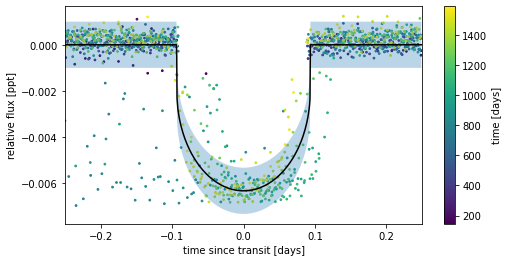

In [ ]:
import arviz as az

sample_summary = az.summary(
    trace
    )

with model:
    lc_pred = pmx.eval_in_model(lc_model, map_soln)
    gp_pred = pmx.eval_in_model(gp.predict(y - lc_pred), map_soln)

plt.figure(figsize=(8, 4))
x_fold = (x - map_soln["t0"] + 0.5 * map_soln["period"]) % map_soln[
    "period"
] - 0.5 * map_soln["period"]


inds = np.argsort(x_fold)
plt.scatter(x_fold, y - gp_pred - map_soln["mean"], c=x, s=3)
plt.plot(x_fold[inds], lc_pred[inds] - map_soln["mean"], "k")
plt.fill_between(x_fold[inds], 
            y1 = lc_pred[inds] - map_soln["mean"] - sample_summary['sd']['mean'], 
            y2 = lc_pred[inds] - map_soln["mean"] + sample_summary['sd']['mean'],
            alpha = 0.3
    )
plt.xlabel("time since transit [days]")
plt.ylabel("relative flux [ppt]")
plt.colorbar(label="time [days]")
_ = plt.xlim(-0.25, 0.25)

In [ ]:
import pickle 

with open("/home/cm2435/Desktop/university_computing_y3/ph30016_b/trace_obj.bin", 'wb') as inp:
    company1 = pickle.dump(trace, inp)


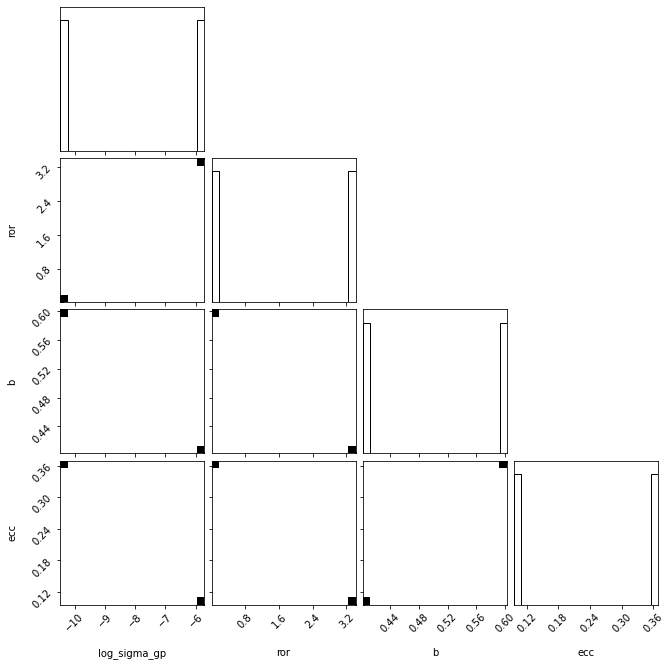

In [ ]:
import corner

_ = corner.corner(
    trace, var_names=["log_sigma_gp", "ror", "b", "ecc"]
)

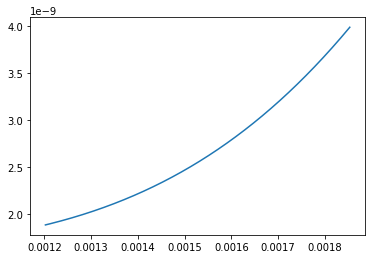

In [ ]:
#time_arr
T = time_arr[0]
dt = time_arr[-1] - time_arr[0]

import scipy.signal
from scipy.signal import lombscargle
freqs = np.linspace((1/T),(1/dt), 2000)
lomb = scipy.signal.lombscargle(time_arr, flux_arr, freqs, precenter=True)

plt.plot(freqs, lomb)

In [ ]:
period = np.argmax(lomb)
print(f"the maximal period is {period}")

In [ ]:
period = np.linspace(1, freqs[-1], 2000)
lomb2 = lombscargle(freqs, lomb, period, precenter = True)

plt.plot(period, lomb2)

period_final = np.argmax(lomb2)
print(f"the final found period is {period_final}")

In [ ]:
def model_curve(x, d, transit_b, transit_e) -> float: 
    """
    """
    m = (16 * (1-d) / (transit_e - transit_b)**4) * (x - (transit_e+transit_b) / 2)**4 + d
    return m

In [ ]:
periods_found_from_lomb = [19.221, 38.433512752318606]

In [ ]:
import pandas as pd 
from typing import Optional


In [ ]:
from utils import fold_lightcurve, model_curve

time_final, p_final, pflux_final, pflux_error_final = fold_lightcurve(
                                            time.tolist(), 
                                            flux.tolist(), 
                                            flux_err.tolist(), 
                                            periods_found_from_lomb[0]
    )

area_mask = (p_final < 1.598) & (p_final > 1.589) & (pflux_final < 0.9985)
plot_mask = (p_final < 1.7) & (p_final > 1.5) 
tester = model_curve(p_final[area_mask], 0.994, 1.589, 1.598)

plt.figure(figsize = (12, 6))

plt.plot(p_final[plot_mask], pflux_final[plot_mask], ls="None", marker="o", ms=3)#ls = 'none')
plt.plot(p_final[plot_mask], pflux_error_final[plot_mask], ls="None", ms=3)#ls = 'none')

plt.plot(p_final[area_mask], tester, ls="None", marker="x", ms=3)#ls = 'none')

plt.xlim(1.57, 1.64)
plt.ylim(0.9925, 1.002)
plt.show()

In [ ]:
transit_middle_mask = np.logical_and(p_final > 1.588, p_final < 1.5975)
transit_middle_mask = np.logical_and(pflux_final > 0.9995, transit_middle_mask)

left_clean = np.logical_and(pflux_final < 0.999, p_final < 1.588)


In [ ]:
area_mask = (p_final < 1.605) & (p_final > 1.58)
area_mask = np.logical_and(area_mask, ~left_clean)
area_mask = np.logical_and(area_mask, ~transit_middle_mask)



In [ ]:
x, y, yerr = p_final[area_mask], pflux_final[area_mask], pflux_error_final[area_mask]

In [ ]:
time = np.ascontiguousarray(x)
flux = np.ascontiguousarray(y)
yerr = np.ascontiguousarray(yerr)

In [ ]:
time_final, p_final, pflux_final, pflux_error_final = fold_lightcurve(
                                            time.tolist(), 
                                            flux.tolist(), 
                                            flux_err.tolist(), 
                                            periods_found_from_lomb[1]
    )

area_mask = (p_final < 1.598) & (p_final > 1.589) & (pflux_final < 0.9985)
plot_mask = (p_final < 1.7) & (p_final > 1.5) 
tester = model_curve(p_final[area_mask], 0.994, 1.589, 1.598)

plt.figure(figsize = (12, 6))

plt.plot(p_final[plot_mask], pflux_final[plot_mask], ls="None", marker="o", ms=3)#ls = 'none')
plt.plot(p_final[area_mask], tester, ls="None", marker="o", ms=3)#ls = 'none')

plt.xlim(1.57, 1.64)
plt.ylim(0.9925, 1.002)
plt.show()

In [ ]:
print(periods_found_from_lomb[0])
time_final1, p_final1, pflux_final1, pflux_error_final1 = fold_lightcurve(
                                            time.tolist(), 
                                            flux.tolist(), 
                                            flux_err.tolist(), 
                                            periods_found_from_lomb[0], 
                                            verbose= True
    )

area_mask = (p_final < 1.598) & (p_final > 1.589) & (pflux_final < 0.9985)
plot_mask = (p_final < 1.7) & (p_final > 1.5) 
tester = model_curve(p_final[area_mask], 0.994, 1.589, 1.598)


#area_mask = (p_final < 1.33) & (p_final > 1.22) & (pflux_final < 0.998)
#plot_mask = (p_final < 1.7) & (p_final > 1.5) 
#tester = model_curve(p_final[area_mask], 0.994, 1.589, 1.598)
    

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(p_final1, pflux_final1, ls="None", marker="o", ms=3)#ls = 'none')
#plt.plot(p_final[area_mask], tester, ls="None", marker="o", ms=1)#ls = 'none')
#
#
plt.xlim(0.53, 0.58)
#plt.ylim(0.9925, 1.002)
#plt.show()